In [1]:

from langgraph.graph import StateGraph, START, MessagesState
from langgraph.checkpoint.memory import InMemorySaver

from dotenv import load_dotenv
from langchain_cerebras import ChatCerebras
from langchain.messages import RemoveMessage

c:\Users\panka\anaconda3\envs\genai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()

True

In [3]:
model=ChatCerebras(model='llama-3.3-70b')

In [4]:

def chat(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

def delete_old_messages(state: MessagesState):
    msgs = state["messages"]

    # if more than 10 messages, delete the earliest 6
    if len(msgs) > 10:
        to_remove = msgs[:6]
        return {"messages": [RemoveMessage(id=m.id) for m in to_remove]}

    return {}

In [5]:

builder = StateGraph(MessagesState)
builder.add_node("chat", chat)
builder.add_node("cleanup", delete_old_messages)

In [6]:

builder.add_edge(START, "chat")
builder.add_edge("chat", "cleanup")   # run deletion after each response
builder.add_edge("cleanup", "__end__")

In [7]:
graph = builder.compile(checkpointer=InMemorySaver())


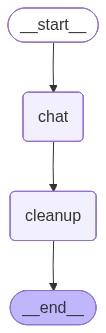

In [8]:
graph

In [9]:
config = {"configurable": {"thread_id": "t1"}}


In [10]:
#Run multiple turns
graph.invoke({"messages": [{"role": "user", "content": "Hi, I'm Nitish"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "Tell me about LangGraph"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "Now explain checkpointers"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Langchain"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Quantum Mechanics"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Gen AI"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is my name"}]}, config)

{'messages': [HumanMessage(content='What is Langchain', additional_kwargs={}, response_metadata={}, id='9bd393ea-1ab7-48cf-807b-b9cbd5a3dec9'),
  AIMessage(content="LangChain is an open-source framework designed to enable the development of large language models (LLMs) and other AI applications. It provides a set of tools, libraries, and interfaces that make it easier to build, train, and deploy LLMs, such as LangGraph.\n\n**Key Features of LangChain:**\n\n1. **Modular architecture**: LangChain provides a modular architecture that allows developers to easily integrate different components, such as language models, datasets, and evaluation metrics.\n2. **LLM-agnostic**: LangChain is designed to be language model-agnostic, meaning it can support a wide range of LLMs, including LangGraph, transformer-based models, and other architectures.\n3. **End-to-end workflow management**: LangChain provides tools and interfaces for managing the entire workflow of building, training, and deploying LL

In [11]:

snap = graph.get_state(config)
print("Stored messages after cleanup:", len(snap.values["messages"]))

Stored messages after cleanup: 8
